In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm
%matplotlib inline

# Экспоненциальное распределение
$$f(x) = \left\{\begin{matrix}
0, x< 0 & \\ 
exp(-x), x\geq 0 & 
\end{matrix}\right.$$
$$EX=1.0, DX=1.0$$

Сгенерируем выборку из экспоненциального распределения размером 1000, построим для нее гистограмму и сравним с теоретической функцией вероятности

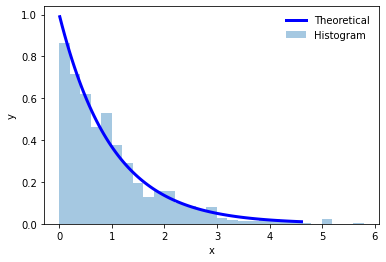

In [7]:
fig, ax = plt.subplots(1, 1) #создаем поле для отображения графиков

r = expon.rvs(size=1000) #создаем выборку случаных величин 
                         #из экспоненциального распределения размером 1000

bins_1 = np.arange (expon.ppf(0.01), expon.ppf(0.99), 0.3) #создаем набор корзин для гистограммы

ax.hist(r, bins = 'auto', density=True, 
        alpha=0.4, label='Histogram') #создаем гистограмму для выборки r c корзинами bins_1
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100) #создаем массив значений по оси абсцисс
plt.plot(x, expon.pdf(x), 'b-', lw=3, 
         alpha=1, label='Theoretical') #рисуем функцию плотности распределения
ax.legend(loc='best', frameon=False) #отображаем легенду
ax.set_xlabel('x') #подписываем ось абсции
ax.set_ylabel('Probability') #подписываем ось оординат
plt.show() #отображаем данные

Создадим 1000 выборок размером 5, 10 и 50, посчитаем средние для них и сравним с нормальным распределением

In [270]:
def avarage_n(size_of_array:int):
    avarage_n_empty = np.array([]) #создаем пустой массив
    for i in range(1000):
        r = expon.rvs(size=size_of_array) #создаем выборку на основе 
                                          #экспоненциального распределения размером 5
        avarage_n_empty = np.append(avarage_n_empty, np.mean(r)) #добавляем выборочное среднее в массив
        
    a = plt.hist(avarage_n_empty, bins = 'auto', density=True, 
                 width = 0.05, alpha=0.4, label= ('n=' + str(size_of_array))) #создаем гистограмму
     
    a_1 = np.linspace((1-np.amax(a[1])), (1+np.amax(a[1])), 100) #создаем массив значений на оси абсцисс, 
                                #для которого будет вычисляться значение функции плотности распределения
    
    math_expectation = expon.stats(moments = 'm')
    variance = (expon.stats(moments = 'v'))/size_of_array
    #математическое ожидание для выборки = 1.0, дисперсия = 1.0/n, где n - размер выборки
    print ('Математическое ожидание для выборки = ', math_expectation, '\n' +
          'Дисперсия для выборки = DX/n = 1.0/n =', variance) 
    
    rv_norm = norm.pdf(a_1, loc=1.0, scale=(1.0/size_of_array)**(0.5)) 
    #вычисляем значения функции плотности распределения
    #в параметр scale передается значение стандартного отклонения, т.е. корень из дисперсии

    plt.xlim([-0.5, 4]) #фиксируем масштаб по оси абсцисс
    plt.plot(a_1, rv_norm, label = 'Norm') #отрисовываем график нормального распределения
    plt.legend(loc='best', frameon=False) #выводим легенду
    plt.xlabel('x') #подписываем ось абсции
    plt.ylabel('Probability') #подписываем ось оординат

    plt.show()
    return

Построим гистограмму и график функции плотности нормального распределения для 1000 выборок размером 5

Математическое ожидание для выборки =  1.0 
Дисперсия для выборки = DX/n = 1.0/n = 0.2


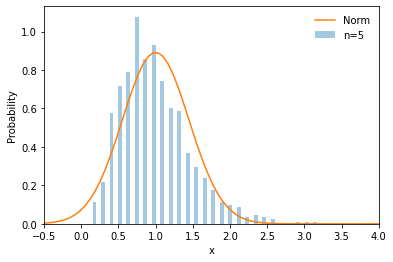

In [271]:
avarage_n(5)

Построим гистограмму и график функции плотности нормального распределения для 1000 выборок размером 10

Математическое ожидание для выборки =  1.0 
Дисперсия для выборки = DX/n = 1.0/n = 0.1


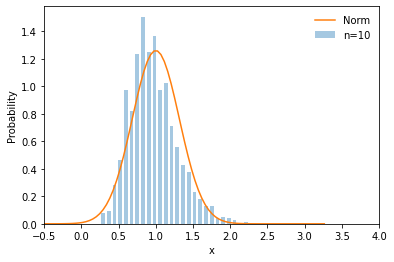

In [272]:
avarage_n(10)

Построим гистограмму и график функции плотности нормального распределения для 1000 выборок размером 50

Математическое ожидание для выборки =  1.0 
Дисперсия для выборки = DX/n = 1.0/n = 0.02


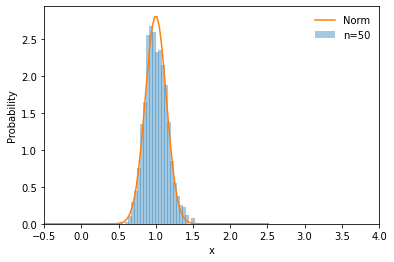

In [273]:
avarage_n(50)

# Выводы
Утверждение ЦПТ выполняется, что наглядно видно при увелечении размеров выборки